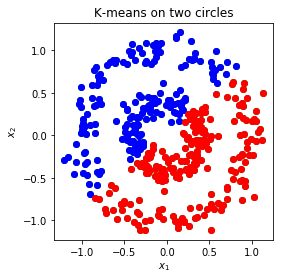

{   'affinity': 'nearest_neighbors',
    'assign_labels': 'kmeans',
    'coef0': 1,
    'degree': 3,
    'eigen_solver': 'arpack',
    'eigen_tol': 0.0,
    'gamma': 1.0,
    'kernel_params': None,
    'n_clusters': 2,
    'n_init': 10,
    'n_jobs': 1,
    'n_neighbors': 10,
    'random_state': None}


/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


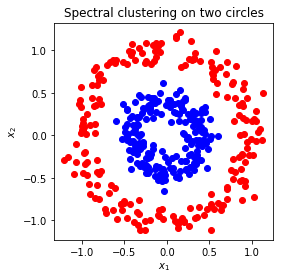

/home/ptah/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ptah/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ptah/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ptah/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprec

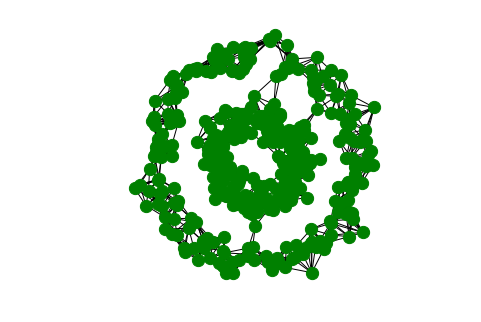

In [10]:
# load libraries and set plot parameters
import numpy as np
import pprint
import networkx as nx

import matplotlib.pyplot as plt


from sklearn import cluster, datasets
np.random.seed(0)
n_samples = 400
X, y = datasets.make_circles(n_samples=n_samples, factor=.4, noise=.1)

plt.title("two circles data")
plt.plot(X[:,0],X[:,1],'go')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.axes().set_aspect('equal')



def fit_and_plot(algorithm,title):
    col = ['bo','ro','co', 'mo','ko']
    algorithm.fit(X)
    n_clusters = algorithm.n_clusters
    lab = algorithm.labels_
    reds = lab == 0
    blues = lab == 1
    for jj in range(n_clusters):
        plt.plot(X[lab == jj, 0], X[lab == jj, 1], col[jj])
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.title(title)
    plt.axes().set_aspect('equal')
    plt.show()


kmeans = cluster.KMeans(n_clusters=2)
fit_and_plot(kmeans, "K-means on two circles")


spectralnn = cluster.SpectralClustering(n_clusters=2,
                                eigen_solver='arpack',
                                affinity='nearest_neighbors',
                                n_neighbors=10)
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(spectralnn.get_params())
fit_and_plot(spectralnn,"Spectral clustering on two circles")


W = spectralnn.affinity_matrix_
G=nx.from_scipy_sparse_matrix(W)
nx.draw(G,X,node_color='g',node_size=150)
plt.axis('equal')
plt.show()

In [56]:
iris = datasets.load_wine()
X = iris.data
y = iris.target

noisy_moons = datasets.make_moons(n_samples=1500, noise=.05)

spectral = SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors')
k_means = KMeans(n_clusters=3, random_state=1)

spectral.fit(X)
print(metrics.adjusted_rand_score(y, spectral.labels_))

k_means.fit(X)
print(metrics.adjusted_rand_score(y, k_means.labels_))

0.35906129467464126
0.37111371823084754


/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


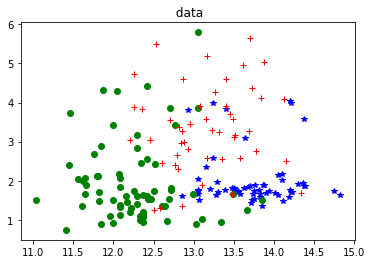

In [57]:
clusters_num = 3
col = ['b*', 'go', 'r+']

plt.figure(1)
plt.title(" data")
for i in range(clusters_num):
    plt.plot(X[y == i, 0], X[y == i, 1], col[i])
plt.show()

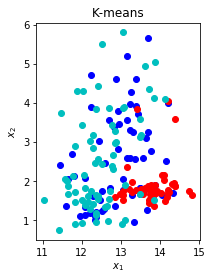

/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


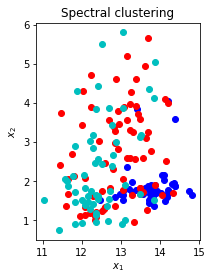

In [58]:
kmeans = cluster.KMeans(n_clusters=3)
fit_and_plot(kmeans, "K-means")


spectralnn = cluster.SpectralClustering(n_clusters=3,
                                eigen_solver='arpack',
                                affinity='nearest_neighbors',
                                n_neighbors=10)
pp = pprint.PrettyPrinter(indent=4)
#pp.pprint(spectralnn.get_params())
fit_and_plot(spectralnn,"Spectral clustering")

In [59]:
algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(SpectralClustering(n_clusters=3, random_state=1,
                                     affinity='nearest_neighbors'))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'Homogenity', 'V-measure'],
                       index=['K-means', 'Spectral'])

results

/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


,ARI,Homogenity,V-measure
K-means,0.371114,0.428812,0.428757
Spectral,0.359061,0.419453,0.419923


# 2

In [61]:
print(__doc__)

# Author: Gael Varoquaux <gael.varoquaux@normalesup.org>, Brian Cheung
# License: BSD 3 clause

import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


# load the raccoon face as a numpy array
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 25

Automatically created module for IPython interactive environment


/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if issubdtype(ts, int):
/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/misc/pilutil.py:485: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


/home/ptah/anaconda3/lib/python3.6/site-packages/scipy/sparse/csgraph/_laplacian.py:72: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if normed and (np.issubdtype(csgraph.dtype, int)


Spectral clustering: kmeans, 3.91s
Spectral clustering: discretize, 3.02s


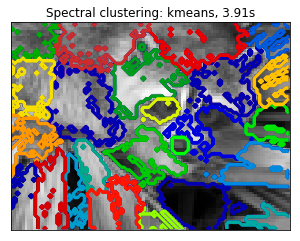

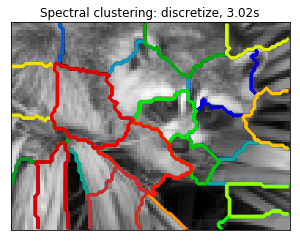

In [62]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,
                    colors=[plt.cm.spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()